Original Beta: 0.3113502000
Optimized Beta: 0.9999940391


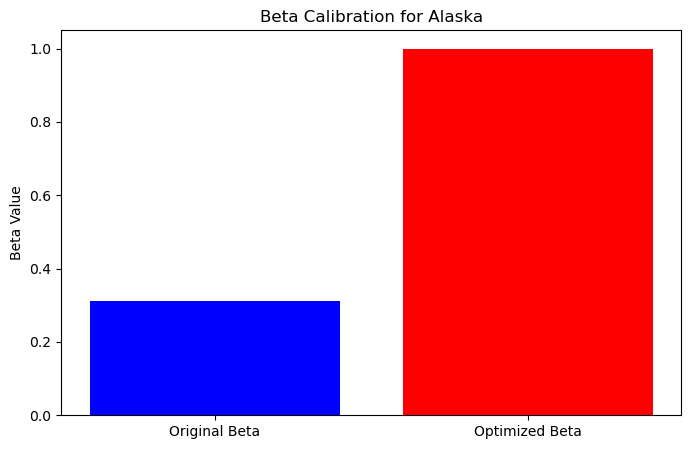

In [174]:
import numpy as np
import pandas as pd
#import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.integrate import odeint 
from scipy import optimize as opt 

df = pd.read_csv(r"E:\Reyhane\Data for Project for the future\archiveSIR\per_location_fitted_params.csv")

region = "Alaska"
region_data = df[df["Province"] == region]

beta_initial = region_data["Beta"].values[0]
gamma = region_data["Gamma"].values[0]
population = region_data["TotalPopulation"].values[0]

def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / population
    dIdt = beta * S * I / population - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

I0 = 1 
S0 = population - I0
R0 = 0
y0 = [S0, I0, R0]

def loss_function(beta, actual_infected):
    t = np.linspace(0, len(actual_infected), len(actual_infected))
    solution = odeint(sir_model, y0, t, args=(beta, gamma)) 
    predicted_infected = solution[:, 1]
    return np.sum((predicted_infected - actual_infected) ** 2)

actual_infected = region_data["FirstDayInfectedCount"].values

optimized_beta = opt.minimize_scalar(loss_function, bounds=(0, 1), args=(actual_infected), method='bounded').x

print(f"Original Beta: {beta_initial:.10f}")
print(f"Optimized Beta: {optimized_beta:.10f}")

plt.figure(figsize=(8,5))
plt.bar(["Original Beta", "Optimized Beta"], [beta_initial, optimized_beta], color=["blue", "red"])
plt.ylabel("Beta Value")
plt.title(f"Beta Calibration for {region}")
plt.show()

In [176]:
data = df[df["Province"] == "Alaska"].iloc[0]
beta = data["Beta"]
beta, optimized_beta

(0.3113502, 0.9999940391390134)

In [178]:
days = 250
t = np.linspace(0, days, days)
solution_optimized = odeint(sir_model, y0, t, args=(optimized_beta, gamma))

In [180]:
S, I, R = solution_optimized.T

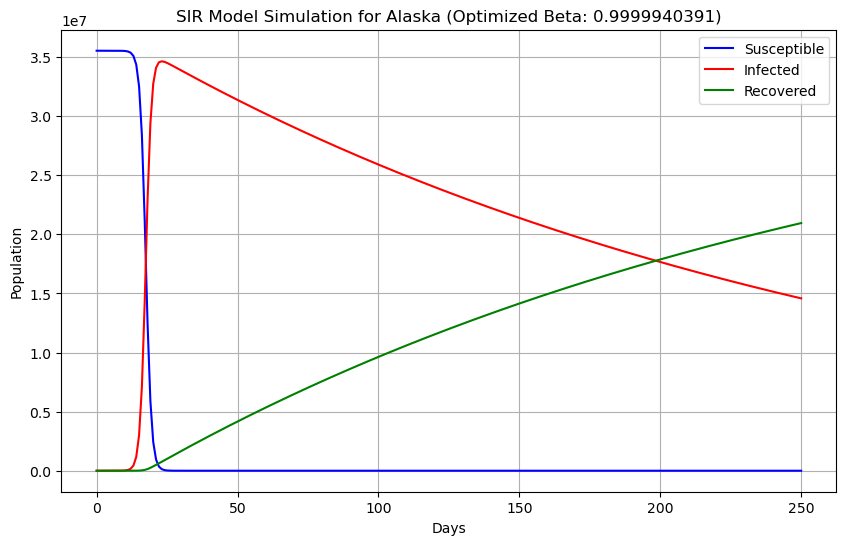

In [182]:
plt.figure(figsize=(10, 6))
plt.plot(t, S, label="Susceptible", color="blue")
plt.plot(t, I, label="Infected", color="red")
plt.plot(t, R, label="Recovered", color="green")
plt.xlabel("Days")
plt.ylabel("Population")
plt.title(f"SIR Model Simulation for {region} (Optimized Beta: {optimized_beta:.10f})")
plt.legend()
plt.grid()
plt.show()